In [13]:
import numpy as np
import matplotlib.pyplot as plt


# 4.6

In [ ]:
x = np.empty(4)
for i in range(4):
    x[i] = np.cos(np.pi * (1+2*i)/8)
    
y = np.array([2,1,3,0])

In [3]:
def phi(i, x):
    if i == 0:
        return 1 + 0*x
    if i == 1:
        return x
    if i == 2:
        return 2*np.power(x, 2) - 1
    if i == 3:
        return 4*np.power(x, 3) -3*x
    

In [5]:
f = np.empty(4)
for i in range(4):
    f[i] = phi(i, x).dot(y)

A = np.zeros((4, 4))
A[0][0] = 4
A[1][1] = 2
A[2][2] = 2
A[3][3] = 2

coeffs = np.linalg.solve(A, f)
print(coeffs)

[ 1.5         0.5411961  -0.70710678  1.30656296]


In [19]:
def approximate(n, x):
    res = np.zeros_like(x)
    for i in range(n + 1):
        res += coeffs[i]*phi(i, x)
    return res

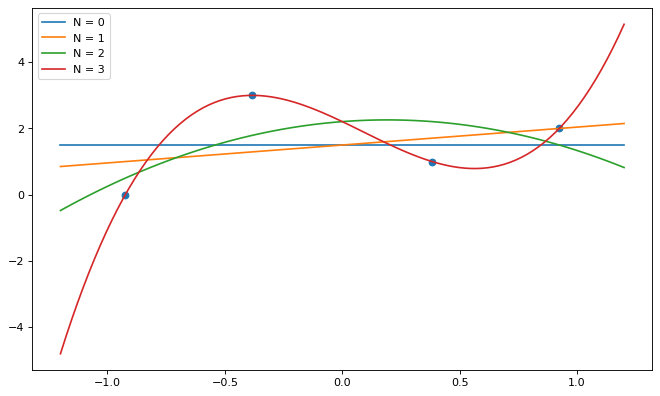

In [21]:
plt.figure(figsize=(10, 6), dpi=80)

x_0 = np.linspace(-1.2, 1.2, 100)

plt.scatter(x, y)

for i in range(4):
    plt.plot(x_0, approximate(i, x_0), label="N = "+ str(i))
    

plt.legend()

In [20]:
err = np.zeros(4)

for i in range(4):
    err[i] = ((y - approximate(i, x))**2).sum()
    print(i, " ", err[i])


0   5.0
1   4.414213562373095
2   3.414213562373096
3   1.639351568662415e-30


#### k = 3 - оптимальное приближение (логично)


# 5.11 а

In [25]:
A = np.array([[2/3, 1], [1, 2]])
f = np.array([4/5, 4/3])

a, b = np.linalg.solve(A, f)

print(a, b)

def f(x):
    return a*x +b

0.8000000000000007 0.2666666666666663


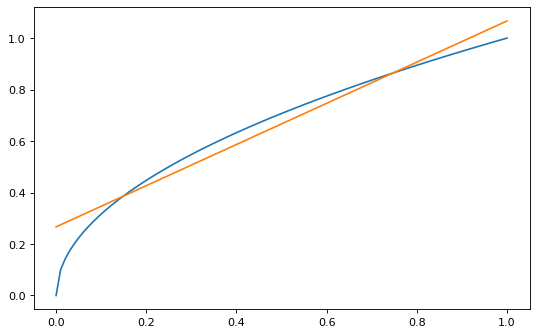

In [24]:
plt.figure(figsize=(8, 5), dpi=80)

x = np.linspace(0, 1, 100)

plt.plot(x, np.sqrt(x))
plt.plot(x, f(x))

# 5.12 аб

In [26]:
x = np.arange(1910., 2010., 10)

y = np.array([92228496. , 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 
              248709873, 281421906])

In [52]:
# number == 0 -> пункт а), number == 1 -> пункт б)
def phi(number, k, x):
    if (number == 0):
        return np.power(x, k)
    return np.power(x - 1910, k)

In [31]:
coeffs = np.zeros((2, 6, 6))

for k in range(3, 7):
    for n in range(2):
      A = np.empty((k,k))
      f = np.empty(k)

      for i in range(k):
          for j in range(i, k):
              A[i][j]  = np.dot(phi(n, i, x), phi(n, j, x))
              A[j][i] = A[i][j]
          f[i] = np.dot(phi(n, i, x), y)
          
      coeffs[n][k - 1][0:k] = np.linalg.solve(A, f)
    
coeffs

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.55745003e+10, -3.83202594e+07,  1.03367965e+04,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.35895148e+11, -4.99288167e+08,  2.46156137e+05,
         -4.02079013e+01,  0.00000000e+00,  0.00000000e+00],
        [-1.75045615e+12,  3.77103197e+09, -3.03121674e+06,
          1.07760705e+03, -1.42957321e-01,  0.00000000e+00],
        [-2.22711056e+12,  3.08676510e+09, -3.83051245e+05,
         -1.27369577e+03,  7.13315106e-01, -1.13669069e-04]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 9.24720613e+07,  1.1

In [44]:
def approximate(number, n, x):
    res = np.zeros_like(x)
    for i in range(n + 1):
        res += coeffs[number][n][i]*phi(number, i, x)
    return res

2    9215390
3    8940426
4    8916839
5    8886471


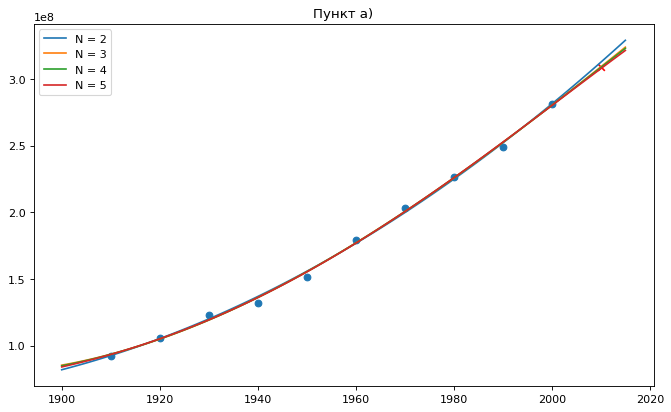

In [50]:
plt.figure(figsize=(10, 6), dpi=80)

x_0 = np.linspace(1900, 2015, 100)

plt.scatter(x, y)

for i in range(2,6):
    plt.plot(x_0, approximate(0, i, x_0), label="N = "+ str(i))
    print(i, "  ", int((np.sqrt(((y - approximate(0, i, x))**2).sum()))))
    
plt.scatter(2010, 308745538, color="red", marker="x")
plt.title("Пункт а)")
plt.legend()

In [49]:
x1 = 2010.
y1 = 308745538

for i in range(2, 6):
    print(i, "   ", int(np.abs(approximate(0, i, x1) - y1)))

2     3724798
3     274960
4     225190
5     1116589


В пункте а) по сумме квадратов отклонений лучше всего приближение при k = 5, а по предсказанию значения в 2010 году - при k = 4

2    9215390
3    8940426
4    8854064
5    5650746


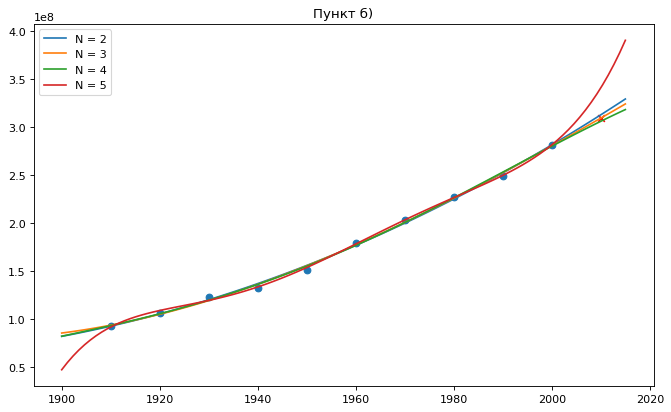

In [51]:
plt.figure(figsize=(10, 6), dpi=80)

plt.scatter(x, y)

for i in range(2,6):
    plt.plot(x_0, approximate(1, i, x_0), label="N = "+ str(i))
    print(i, "  ", int((np.sqrt(((y - approximate(1, i, x))**2).sum()))))


plt.scatter(2010, 308745538, color="red", marker="x")   
plt.title("Пункт б)") 
plt.legend()

In [54]:
for i in range(2, 6):
    print(i, "   ", int(np.abs(approximate(1, i, x1) - y1)))

2     3724798
3     275441
4     3039362
5     31862193


В пункте б) по сумме квадратов отклонений лучше всего приближение при k = 5, а по предсказанию значения в 2010 году - при k = 3


В двух пунктах по сумме квадратов отклонений лучше всего приближение из пункта б) при k = 5, а по предсказанию значения в 2010 году - приближение из пункта а) при k = 4 